In [1]:
import sys
quic_path = '/home/quic/QUIC-Projects'
if not quic_path in sys.path:
    sys.path.append(quic_path)

Search for the effect of conventional form and 'reduced' form

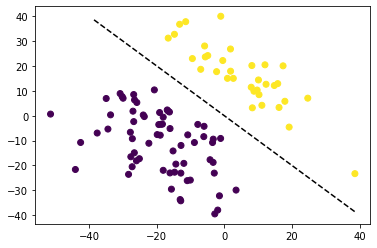

In [2]:
from custom_qiskit_v3_2.datageneration import Toy2DLinearLoader
import numpy as np
from matplotlib import pyplot as plt
def draw(w, b):
    x = np.linspace(-10, 10, 100)
    y = -w[0]/w[1]*x-b/w[1]
    plt.plot(x, y)
dl = Toy2DLinearLoader(w=(.1,.1), b=0)
X, y = dl(100)
dl.plot(X, y)

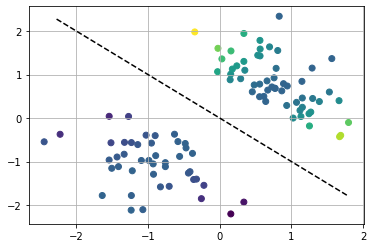

In [3]:
from custom_qiskit_v3_1.datageneration import Toy2DLinearLoader
import numpy as np
from matplotlib import pyplot as plt
def draw(w, b):
    x = np.linspace(-10, 10, 100)
    y = -w[0]/w[1]*x-b/w[1]
    plt.plot(x, y)
dl = Toy2DLinearLoader(w=(1,1), b=0)
X, y = dl(100)
plt.grid()
from custom_qiskit_v3_1.classifier import Kernel, BinarySVM
kernel = Kernel('Phase',1)
svm = BinarySVM(kernel, C=None, mutation='REDUCED_QASVM')
svm.fit(X, y)
svm.accuracy(X, y)
w_est = sum(svm.alpha[i]*X[i]*svm.polary[i] for i in range(len(y)))
b_est = svm.b
dl.plot(X, y, c=svm.f(X))

In [4]:
svm.accuracy(X, y)

0.97

## with bias

In [5]:
from custom_qiskit_v3_2.datageneration import DataScaler, Toy2DLinearLoader
from custom_qiskit_v3_2.classifier import Kernel, BinarySVM
import numpy as np 
from matplotlib import pyplot as plt

kernel = Kernel('linear', 1)
svm = BinarySVM(kernel=kernel, C=None, mutation='REDUCED_SVM')
print(svm)

BinarySVM: (REDUCED_SVM)
	Kernel: linear
	HyperParameter: None
	Optimization Status: None
	Iterations: None


In [6]:
w = 10*np.random.randn(2)
b = 1000*np.random.random()
print('w: {:}\nb: {:}'.format(w, b))

w: [  5.55740232 -19.47400815]
b: 822.5256085537933


In [7]:
dl = Toy2DLinearLoader(w, b)
X, y = dl(100)
svm.fit(X, y)
svm

BinarySVM: (REDUCED_SVM)
	Kernel: linear
	HyperParameter: None
	Optimization Status: optimal
	Iterations: 17

Text(0.5, 1.0, 'SVM')

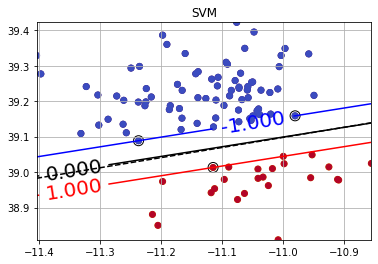

In [8]:
ax = plt.subplot()
dl.plot(X, y)
svm.plot('sv', axes=plt)
svm.plot_boundary(ax)
ax.set_title('SVM')

## Compare

In [9]:
from custom_qiskit_v3_2.datageneration import DataScaler, Toy2DLinearLoader
from custom_qiskit_v3_2.classifier import Kernel, BinarySVM
import numpy as np 
from matplotlib import pyplot as plt


In [10]:
kernel = Kernel('linear', 1)
C = None
svm = BinarySVM(kernel=kernel, C=C, mutation='SVM')
print('svm:\n', svm)
print('\n')
reduced_svm = BinarySVM(kernel=kernel, C=C, mutation='REDUCED_SVM')
print('reduced_svm:\n', reduced_svm)

svm:
 BinarySVM: (SVM)
	Kernel: linear
	HyperParameter: None
	Optimization Status: None
	Iterations: None


reduced_svm:
 BinarySVM: (REDUCED_SVM)
	Kernel: linear
	HyperParameter: None
	Optimization Status: None
	Iterations: None


In [11]:
w = (1,1)
b = 100
print('w: {:}\nb: {:}'.format(w, b))

w: (1, 1)
b: 100


In [12]:
dl = Toy2DLinearLoader(w, b)
X, y = dl(100)

In [13]:
svm.fit(X, y)
print(svm)
reduced_svm.fit(X, y)
print(reduced_svm)

BinarySVM: (SVM)
	Kernel: linear
	HyperParameter: None
	Optimization Status: optimal
	Iterations: 9
BinarySVM: (REDUCED_SVM)
	Kernel: linear
	HyperParameter: None
	Optimization Status: optimal
	Iterations: 11


Text(0.5, 1.0, 'REDUCED_SVM')

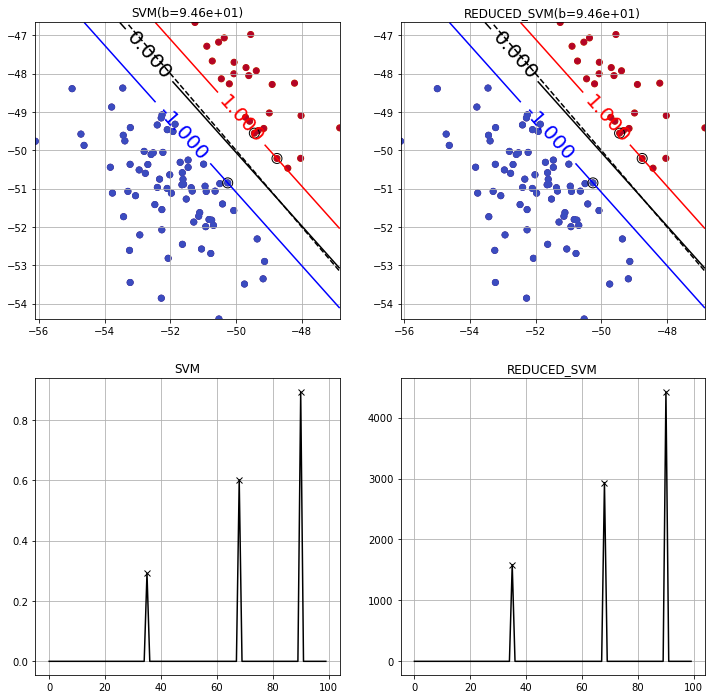

In [14]:
fig, axes = plt.subplots(2, 2, figsize=(12,12))
dl.plot(X, y, axes[0,0])
svm.plot('sv', axes=axes[0,0])
svm.plot_boundary(axes[0,0])
if svm.status == 'optimal':
    axes[0,0].set_title('SVM(b={:.2e})'.format(svm.b))
else:
    axes[0,0].set_title(f'SVM(status:{svm.status})')

dl.plot(X, y, axes[0,1])
reduced_svm.plot('sv', axes=axes[0,1])
reduced_svm.plot_boundary(axes[0,1])
if reduced_svm.status == 'optimal':
    axes[0,1].set_title('REDUCED_SVM(b={:.2e})'.format(reduced_svm.b))
else:
    axes[0,1].set_title(f'REDUCED_SVM(status:{reduced_svm.status})')

svm.plot('alpha', axes=axes[1,0])
axes[1,0].set_title('SVM')

reduced_svm.plot('alpha', axes=axes[1,1])
axes[1,1].set_title('REDUCED_SVM')

In [15]:
from custom_qiskit_v3_2.datageneration import DataScaler
ds = DataScaler(X)
X_scale = ds(X)

svm = BinarySVM(kernel, C, mutation='SVM')
svm.fit(X_scale, y)
reduced_svm = BinarySVM(kernel, C, mutation='REDUCED_SVM')
reduced_svm.fit(X_scale, y)


Text(0.5, 1.0, 'REDUCED_SVM')

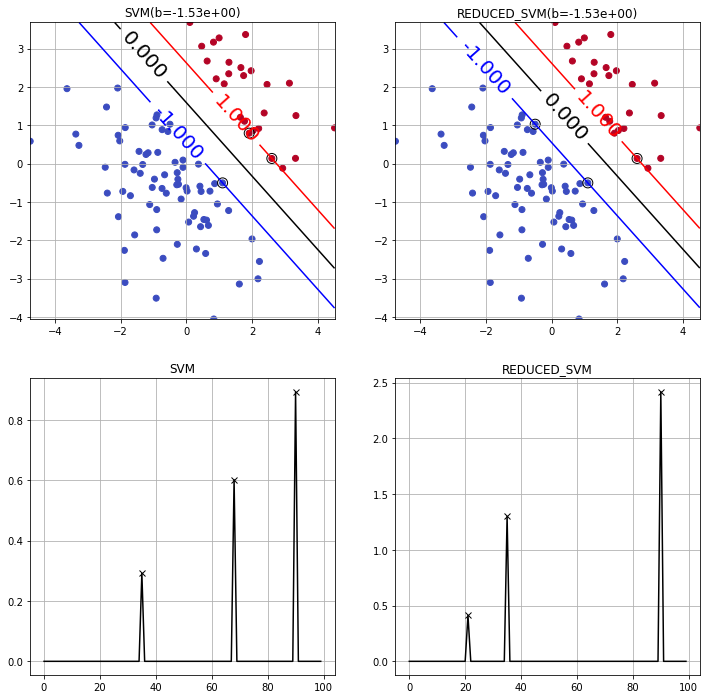

In [16]:
fig, axes = plt.subplots(2, 2, figsize=(12,12))
svm.plot('sv', axes=axes[0,0])
svm.plot_boundary(axes[0,0])
if svm.status == 'optimal':
    axes[0,0].set_title('SVM(b={:.2e})'.format(svm.b))
else:
    axes[0,0].set_title(f'SVM(status:{svm.status})')

reduced_svm.plot('sv', axes=axes[0,1])
reduced_svm.plot_boundary(axes[0,1])
if reduced_svm.status == 'optimal':
    axes[0,1].set_title('REDUCED_SVM(b={:.2e})'.format(reduced_svm.b))
else:
    axes[0,1].set_title(f'REDUCED_SVM(status:{reduced_svm.status})')

svm.plot('alpha', axes=axes[1,0])
axes[1,0].set_title('SVM')

reduced_svm.plot('alpha', axes=axes[1,1])
axes[1,1].set_title('REDUCED_SVM')